In [2]:
from evaluator import *
import pandas as pd
import sklearn.preprocessing as pp
from scipy import misc

In [ ]:
def make_csv(mdl_name, data_name, cnn_mlp=False):
    ir = ImageRecognition()
    #  ir.load_processed_data('data/data_image_100.pkl')
    #  load_metadata('metadata_02-20-2017_02:10:32.pkl')
    ir.load_processed_data(data_name)
    test = ir.data[:, :-99]
    label = ir.data[:, -99:]
    metadata = dict(
        test=test,
        test_labels=label,
        id=ir.identifier,
        one_hot_names=ir.one_hot_names,
        n_input=ir.n_input,
        model_name = mdl_name,
        weight_dir="weight/",
        prediction_dir="predictions/",
        tensor_name="output/activation:0",
        input_x_tensor_name="input_1/x-input:0",
        input_y_tensor_name="input_1/y-input:0",
        learning_rate=0.01,
        debug=True)

#     load_session_and_save_prediction(**metadata)
#     pred = load_predictions(metadata['prediction_dir'] + metadata['model_name'])
#     return pred
    test_csv = pd.read_csv('csv/test.csv')
    test_data = test_csv.drop(['id'], axis=1).as_matrix()
    n_input = test_data.shape[1]
    identifier = test_csv['id'].as_matrix()
    
    sess = load_session(metadata['weight_dir']+metadata['model_name'])
    y_ = get_tensor(sess, metadata['tensor_name'])
    if cnn_mlp:
        test_img = process_images(100, 'images/processed_100/',1584)
        prediction = sess.run(y_,
                  feed_dict={'input/keep_probability:0': 1.0,
                             'input_1/x-input:0': test_img,
                             'x-input2:0': test_data})
    else:
        prediction = predict(sess, y_, test_data)
    
    #scale
    pred_0_to_1 = pp.minmax_scale(prediction, axis=1)
    pred = pred_0_to_1/np.sum(pred_0_to_1, axis=1, keepdims=True)
    
    df = pd.DataFrame(data=pred, index=identifier,columns=ir.one_hot_names)
    df.index.name='id'
    return df,pred
    

In [ ]:
def process_images(single_side, image_dir, num_images):
    n_input = single_side * single_side

    test_im = np.zeros(shape=(num_images, n_input))  # initiate array
    for i in range(1, num_images):
        im = misc.imread(image_dir + str(i) + ".jpg")  # transform to matrix
        test_im[i - 1] = im.ravel()  # Shift index due to numpy's zero-indexing

    test_csv = pd.read_csv('csv/test.csv')

    test_idx = test_csv['id'] - 1  # subtract 1 to take care of zero-indexing
    test = test_im[test_idx]  # extract training pictures from images
    print "Train ID images:", test.shape
    
    return test
    
out = process_images(100, 'images/processed_100/',1584)

In [ ]:
plt.imshow(np.reshape(out[0], [100,100]), cmap='gray')
plt.show()

In [ ]:
ipt_sub = import_submission('submissions/test_submission3.csv')

In [ ]:
df,pred = make_csv('cnn_mlp_02-25-2017_22:26:54-399', 'data/data_image_100_csv.pkl', True)


In [ ]:

print df.head(20).max(axis=1)
print df.head(20).idxmax(axis=1)
print
print ipt_sub.head(20).drop('id', axis=1).max(axis=1)
print ipt_sub.head(20).drop('id', axis=1).idxmax(axis=1)

In [12]:
ipt_sub = pd.read_csv('test_submission6.csv')
sub = pd.read_csv('submit.csv')
print ipt_sub.shape
print sub.shape

(594, 100)
(594, 100)


In [16]:
ipt_sub_max = ipt_sub.drop('id', axis=1).idxmax(axis=1)
sub_max = sub.drop('id',axis=1).idxmax(axis=1)
print "ipt_sub"
print ipt_sub_max.head(10)
print ipt_sub_max.tail(10)
print "sub"
print sub_max.head(10)
print sub_max.tail(10)

ipt_sub
0         Quercus_Agrifolia
1            Quercus_Afares
2           Acer_Circinatum
3           Castanea_Sativa
4             Alnus_Viridis
5               Acer_Opalus
6               Acer_Opalus
7    Eucalyptus_Glaucescens
8        Quercus_Variabilis
9            Acer_Rufinerve
dtype: object
584      Magnolia_Salicifolia
585             Quercus_Suber
586           Quercus_Brantii
587      Callicarpa_Bodinieri
588       Cytisus_Battandieri
589           Acer_Circinatum
590               Alnus_Rubra
591       Quercus_Canariensis
592    Quercus_Phillyraeoides
593       Arundinaria_Simonii
dtype: object
sub
0         Quercus_Agrifolia
1            Quercus_Afares
2           Acer_Circinatum
3           Castanea_Sativa
4             Alnus_Viridis
5               Acer_Opalus
6               Acer_Opalus
7    Eucalyptus_Glaucescens
8        Quercus_Variabilis
9            Acer_Rufinerve
dtype: object
584      Magnolia_Salicifolia
585             Quercus_Suber
586           Quercus_Bran

In [8]:
print ipt_sub_max
print sub_max

0              Quercus_Agrifolia
1                 Quercus_Afares
2                Acer_Circinatum
3                Castanea_Sativa
4                  Alnus_Viridis
5                    Acer_Opalus
6                    Acer_Opalus
7         Eucalyptus_Glaucescens
8             Quercus_Variabilis
9                 Acer_Rufinerve
10                   Phildelphus
11               Quercus_Pontica
12             Quercus_Pubescens
13                 Alnus_Cordata
14             Quercus_Alnifolia
15                 Populus_Nigra
16         Populus_Grandidentata
17        Quercus_Phillyraeoides
18             Alnus_Sieboldiana
19             Quercus_Palustris
20             Quercus_Crassipes
21        Quercus_Infectoria_sub
22           Quercus_Chrysolepis
23           Quercus_Rhysophylla
24               Acer_Circinatum
25                 Quercus_Nigra
26        Eucalyptus_Glaucescens
27           Arundinaria_Simonii
28       Liquidambar_Styraciflua
29                 Quercus_Nigra
          

In [21]:
diff = ipt_sub_max == sub_max
diff_idx =  diff[diff == False]

print diff_idx.index
print
print "ipt prediction"
print ipt_sub_max[diff_idx.index]
print ipt_sub.loc[diff_idx.index].drop('id', axis=1).max(axis=1)
print
print "sub prediction"
print sub_max[diff_idx.index]
print sub.loc[diff_idx.index].drop('id', axis=1).max(axis=1)
print
print "image id"
print sub.loc[diff_idx.index]['id']

Int64Index([127], dtype='int64')

ipt prediction
127    Populus_Adenopoda
dtype: object
127    0.562187
dtype: float64

sub prediction
127    Fagus_Sylvatica
dtype: object
127    0.910051
dtype: float64

image id
127    297
Name: id, dtype: int64


In [43]:
print "IPT_SUB LOWEST PREDICTIONS"
n_show = 20
ipt_lowest_n = ipt_sub.drop('id',axis=1).max(axis=1).sort_values().head(n_show)
low_pred2 = ipt_sub.drop('id',axis=1).max(axis=1).sort_values().head(n_show).index
ipt_lowest_id = ipt_sub.loc[low_pred2]['id']
ipt_lowest_name = ipt_sub_max.loc[low_pred2]
print pd.concat([ipt_lowest_n, ipt_lowest_id, ipt_lowest_name], axis=1)
print
print "SUB LOWEST PREDICTIONS"
sub_lowest_n = sub.drop('id',axis=1).max(axis=1).sort_values().head(n_show)
low_pred = sub.drop('id',axis=1).max(axis=1).sort_values().head(n_show).index
sub_lowest_id = sub.loc[low_pred]['id']
sub_lowest_name = sub_max.loc[low_pred]
print pd.concat([sub_lowest_n, sub_lowest_id, sub_lowest_name], axis=1)


IPT_SUB LOWEST PREDICTIONS
            0    id                       1
127  0.562187   297       Populus_Adenopoda
490  0.598062  1304  Eucalyptus_Glaucescens
350  0.704368   947  Quercus_Semecarpifolia
130  0.705732   301      Cornus_Controversa
545  0.750924  1447     Quercus_x_Hispanica
37   0.772052    97   Quercus_Castaneifolia
517  0.824912  1382        Quercus_Kewensis
416  0.893319  1109       Quercus_Palustris
258  0.903441   665   Quercus_Castaneifolia
581  0.930529  1546     Quercus_Canariensis
303  0.939084   790          Betula_Pendula
313  0.958606   829      Lithocarpus_Edulis
136  0.968121   318     Eucalyptus_Neglecta
448  0.969741  1190          Betula_Pendula
328  0.977932   887   Quercus_Castaneifolia
142  0.980679   347     Quercus_x_Hispanica
407  0.981037  1092     Eucalyptus_Neglecta
479  0.987938  1274             Alnus_Rubra
193  0.989388   500      Alnus_Maximowiczii
230  0.991645   587           Tilia_Oliveri

SUB LOWEST PREDICTIONS
            0    id      

Save and remove index
Axes(0.125,0.125;0.775x0.755)


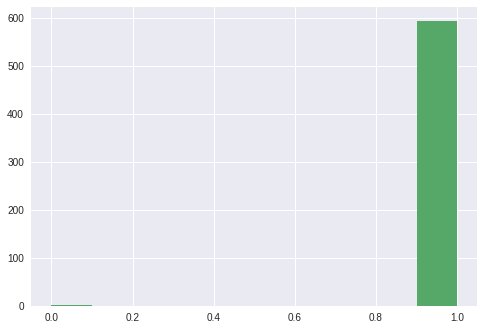

In [55]:
print "Save and remove index"
sub_round = sub.round(0)
print sub_round.drop('id', axis=1).sum(axis=1).hist()
plt.show()

In [86]:
is_zero = sub_round.drop('id', axis=1).sum(axis=1) == 0
print is_zero.idxmax()
print "Indeed this column is zero:", sub_round.iloc[490].drop('id').sum()
sub_round_copy = sub_round.copy()

490
Indeed this column is zero: 0.0


1.0
(594, 100)
Axes(0.125,0.125;0.775x0.755)


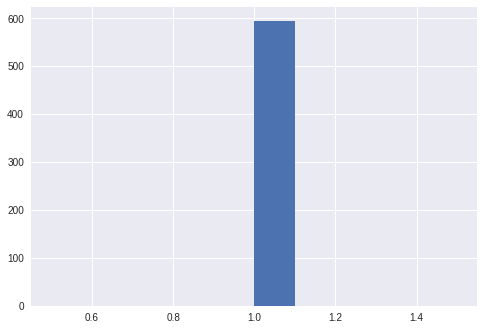

In [87]:
sub_round_copy.loc[490, 'Eucalyptus_Glaucescens'] = 1
print sub_round_copy.iloc[490]['Eucalyptus_Glaucescens'] 
print sub_round_copy.shape
print sub_round_copy.drop('id', axis=1).sum(axis=1).hist()
plt.show()

In [88]:
sub_round_copy.to_csv('test_submission8.csv', index=False)